# Convert Coco JSON Annotations to YOLO TXT Files
Use this notebook to try out importing, analyzing, and exporting datasets of image annotations. 

In [1]:
import logging
logging.getLogger().setLevel(logging.CRITICAL)
!pip install pylabel > /dev/null

In [2]:
from pylabel import importer

## Import coco annotations 
First we will import annotations from the coco dataset, which are in coco json format. 

In [3]:
import os 
import zipfile

#Download sample  dataset 
# os.makedirs("data", exist_ok=True)
# !wget "https://github.com/pylabelalpha/notebook/blob/main/BCCD_coco.zip?raw=true" -O data/BCCD_coco.zip
# with zipfile.ZipFile("data/BCCD_coco.zip", 'r') as zip_ref:
#    zip_ref.extractall("data")

#Specify path to the coco.json file
path_to_annotations = "/content/data/COCO mask annotaion -Fractured-.json"
#Specify the path to the images (if they are in a different folder than the annotations)
path_to_images = ""

#Import the dataset into the pylable schema 
dataset = importer.ImportCoco(path_to_annotations, path_to_images=path_to_images, name="BCCD_coco")
dataset.df.head(5)


img_folder    img_filename img_path  img_id  img_width  img_height  \
id                                                                      
0              IMG0000025.jpg                1       2880        2304   
1              IMG0000044.jpg                2       2304        2880   
2              IMG0000100.jpg                3       2304        2880   
3              IMG0000155.jpg                4       2304        2880   
4              IMG0000156.jpg                5       2304        2880   

   img_depth ann_segmented  ann_bbox_xmin  ann_bbox_ymin  ...  \
id                                                        ...   
0                             1466.504519    2010.557108  ...   
1                             1426.511093    1072.013147  ...   
2                              683.437962    1038.882498  ...   
3                              491.753492    1043.615448  ...   
4                              647.940838    1090.944947  ...   

                                     ann_segmentation  ann_iscrowd  ann_pose  \
id                                                                             
0   [[1466.504519309778, 2010.557107641742, 1515.7...            0             
1   [[1554.300739523418, 1076.746096959737, 1457.2...            0             
2   [[683.4379622021364, 1088.5784716516023, 685.8...            0             
3   [[572.2136400986032, 1043.6154478225144, 515.4...            0             
4   [[700.0032867707478, 1098.0443714050944, 657.4...            0             

    ann_truncated  ann_difficult cat_id   cat_name cat_supercategory split  \
id                                                                           
0                                     0  fractured                           
1                                     0  fractured                           
2                                     0  fractured                           
3                                     0  fractured                           
4                                     0  fractured                           

   annotated  
id            
0          1  
1          1  
2          1  
3          1  
4          1  

[5 rows x 25 columns]

## Analyze annotations
Pylabel can calculate basic summary statisticts about the dataset such as the number of files and the classes. 
The dataset is stored as a pandas frame so the developer can do additional exploratory analysis on the dataset. 

In [4]:
print(f"Number of images: {dataset.analyze.num_images}")
print(f"Number of classes: {dataset.analyze.num_classes}")
print(f"Classes:{dataset.analyze.classes}")
print(f"Class counts:\n{dataset.analyze.class_counts}")
print(f"Path to annotations:\n{dataset.path_to_annotations}")


Number of images: 611
Number of classes: 1
Classes:['fractured']
Class counts:
fractured    796
Name: cat_name, dtype: int64
Path to annotations:
/content/data


## Visualize Annotations 
You can render the bounding boxes for your image to inspect them and confirm that they imported correctly.  

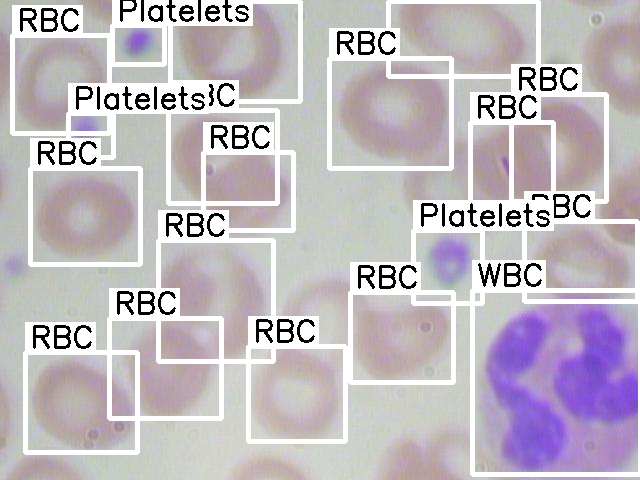

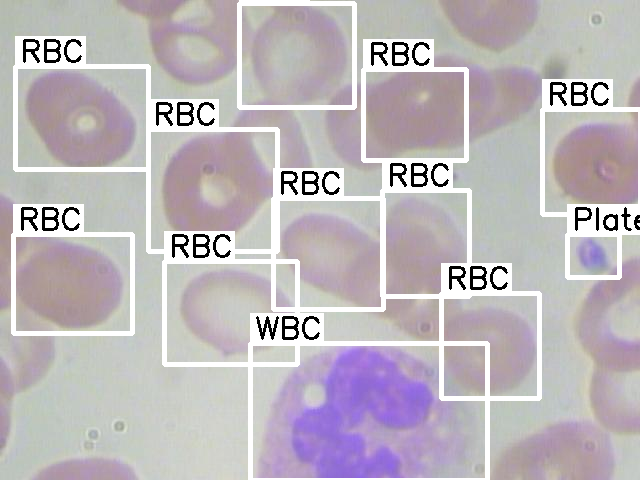

In [ ]:
from IPython.display import Image, display
display(dataset.visualize.ShowBoundingBoxes(100))
display(dataset.visualize.ShowBoundingBoxes("BloodImage_00315.jpg"))

# Export to Yolo v5
The PyLabel exporter will export all of the annotations in the dataframe to the desired target format.
Yolo creates one text file for each image in the dataset. 

In [5]:
dataset.path_to_annotations = "data/yolo"
dataset.export.ExportToYoloV5()[0]

'training/dataset.yaml'

In [6]:
!zip -r /content/YOLO.zip /content/training

  adding: content/training/ (stored 0%)
  adding: content/training/labels/ (stored 0%)
  adding: content/training/labels/IMG0003419.txt (deflated 13%)
  adding: content/training/labels/IMG0000456.txt (deflated 7%)
  adding: content/training/labels/IMG0002590.txt (deflated 22%)
  adding: content/training/labels/IMG0002475.txt (deflated 23%)
  adding: content/training/labels/IMG0003374.txt (deflated 10%)
  adding: content/training/labels/IMG0002601.txt (deflated 10%)
  adding: content/training/labels/IMG0001762.txt (deflated 10%)
  adding: content/training/labels/IMG0002479.txt (deflated 13%)
  adding: content/training/labels/IMG0002349.txt (deflated 13%)
  adding: content/training/labels/IMG0002606.txt (deflated 10%)
  adding: content/training/labels/IMG0002518.txt (deflated 7%)
  adding: content/training/labels/IMG0002581.txt (deflated 32%)
  adding: content/training/labels/IMG0003589.txt (deflated 13%)
  adding: content/training/labels/IMG0002523.txt (deflated 28%)
  adding: content/t